# Nafiz Emir Eğilli - FERM 536 - Assignment III - Okun’s Law

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

import warnings
warnings.filterwarnings("ignore")

C:\Users\emir.e\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Q3A-) Estimate the QoQchange in seasonally adjusted unemployment rate (UR) on corresponding seasonally adjusted real GDP growth rate (%QoQ)

In [2]:
okuns_law_df = pd.read_csv('okuns_law.csv')
okuns_law_df.head()

,quarter,Gayrisafi yurt içi hasıla (alıcı fiyatlarıyla),Unemployment rate
0,1998-03-01,71.633277,NaN
1,1998-06-01,71.062687,NaN
2,1998-09-01,70.062782,NaN
3,1998-12-01,69.881538,NaN
4,1999-03-01,68.703461,NaN


In [3]:
okuns_law_cleaned_df = okuns_law_df.dropna()
okuns_law_cleaned_df['GSYİH_%QoQ'] = okuns_law_cleaned_df['Gayrisafi yurt içi hasıla (alıcı fiyatlarıyla)'].pct_change() * 100
okuns_law_cleaned_df['UR_QoQchange'] = okuns_law_cleaned_df['Unemployment rate'].diff()
okuns_law_cleaned_df.head()

,quarter,Gayrisafi yurt içi hasıla (alıcı fiyatlarıyla),Unemployment rate,GSYİH_%QoQ,UR_QoQchange
28,2005-03-01,91.041903,17.2,NaN,NaN
29,2005-06-01,91.426245,17.4,0.422159,0.2
30,2005-09-01,92.717157,17.0,1.411971,-0.4
31,2005-12-01,95.783132,16.7,3.306804,-0.3
32,2006-03-01,96.879976,16.7,1.145133,0.0


In [4]:
okuns_law_final_df = okuns_law_cleaned_df.dropna()

X = okuns_law_final_df[['GSYİH_%QoQ']]
y = okuns_law_final_df['UR_QoQchange']
X_with_constant = sm.add_constant(X)

model_sm = sm.OLS(y, X_with_constant).fit()

model_summary = model_sm.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:           UR_QoQchange   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     6.940
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0103
Time:                        11:07:24   Log-Likelihood:                -105.17
No. Observations:                  75   AIC:                             214.3
Df Residuals:                      73   BIC:                             219.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1136      0.125      0.906      0.3

### COMMENTS:
#### The model suggests that a one percent increase in the real GDP growth rate is associated with a decrease of about 0.1049 points in the quarterly unemployment rate change. This relationship is found to be statistically meaningful, with a p-value less than 0.05.

#### The coefficient of determination, or R-squared value, is 0.087. This value implies that the model accounts for roughly 8.7% of the variability in the quarterly shifts in the unemployment rate, indicating a limited explanatory power for changes in the unemployment rate.

#### While the intercept of the model does not show statistical significance (p-value of 0.368), the influence of GDP growth rate on the unemployment rate is statistically significant, underscoring the impactful role of economic expansion on employment levels.

## Q3B-) Check if lagged values of real GDP growth are significant as well.

In [5]:
okuns_law_final_df['GSYİH_%QoQ_lag1'] = okuns_law_final_df['GSYİH_%QoQ'].shift(1)
okuns_law_final_df['GSYİH_%QoQ_lag2'] = okuns_law_final_df['GSYİH_%QoQ'].shift(2)

okuns_law_final_df_lagged = okuns_law_final_df.dropna()

X_lagged = okuns_law_final_df_lagged[['GSYİH_%QoQ', 'GSYİH_%QoQ_lag1', 'GSYİH_%QoQ_lag2']]
y_lagged = okuns_law_final_df_lagged['UR_QoQchange']

X_lagged_with_constant = sm.add_constant(X_lagged)

model_lagged = sm.OLS(y_lagged, X_lagged_with_constant).fit()

model_lagged_summary = model_lagged.summary()
print(model_lagged_summary)

                            OLS Regression Results                            
Dep. Variable:           UR_QoQchange   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     11.68
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           2.79e-06
Time:                        11:07:28   Log-Likelihood:                -91.579
No. Observations:                  73   AIC:                             191.2
Df Residuals:                      69   BIC:                             200.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5181      0.137     

### COMMENTS: 
#### The analysis reveals that immediate as well as delayed effects of real GDP growth rates significantly influence the quarterly shifts in the unemployment rate. A one percent rise in the GDP growth rate corresponds to a reduction in the unemployment rate change by 0.1430 points in the same quarter, 0.1764 points in the subsequent quarter, and 0.1028 points two quarters later. These findings highlight the prolonged influence of economic growth on unemployment, emphasizing the importance of considering past GDP growth rates in understanding this dynamic.

#### With an R-squared value of 33.7%, the model accounts for a significant portion, approximately one-third, of the variability in the quarterly changes in the unemployment rate. This improvement in the model's explanatory capability suggests that incorporating lagged economic indicators enhances the understanding of fluctuations in the unemployment rate.

## Q3C-) Check residuals for outliers and correlogram. Use dummies if needed

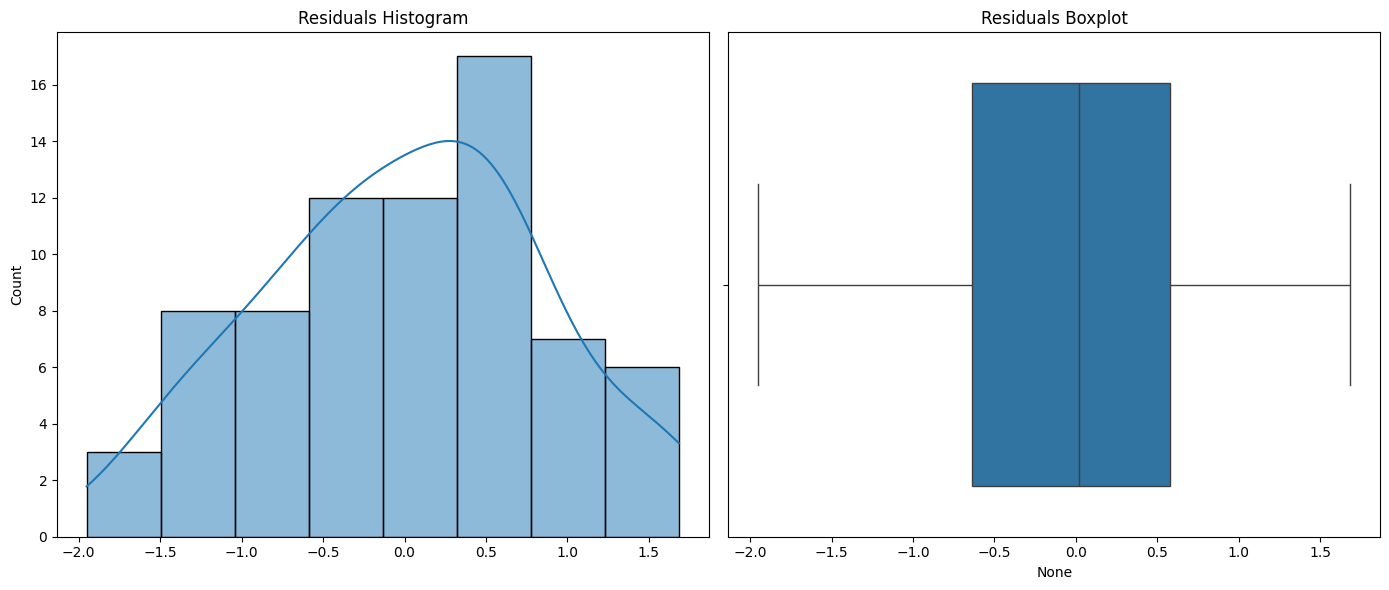

In [6]:
residuals = model_lagged.resid

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')

plt.subplot(1, 2, 2)
sns.boxplot(x=residuals)
plt.title('Residuals Boxplot')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

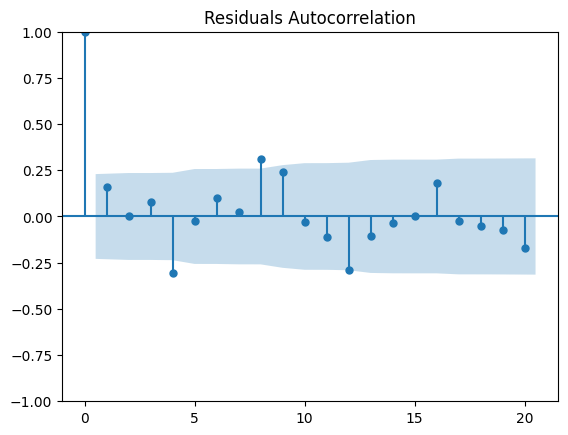

In [7]:
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=20)
plt.title('Residuals Autocorrelation')
plt.show()

### COMMENTS:
#### The chart shows that at specific lags, the bars surpass the confines of the blue shaded region, signaling statistically significant autocorrelation at those points. This observation implies potential gaps in the model's ability to encapsulate all time series dynamics, or it might point to the presence of seasonal influences that have not been fully accounted for.

## Q4-) Given your preferred model(s), calculate the impact of a 1pp increase in real GDP on unemployment rate

## •in the same quarter

## •in the long-run.

In [8]:
short_term_effect =  model_lagged.params['GSYİH_%QoQ']  
long_term_effect =  model_lagged.params['GSYİH_%QoQ'] + model_lagged.params['GSYİH_%QoQ_lag1'] + model_lagged.params['GSYİH_%QoQ_lag2'] 

print(f'Short term effect: {short_term_effect:.4f}') 
print(f'Long term effect: {long_term_effect:.4f}')

Short term effect: -0.1430
Long term effect: -0.4222


### COMMENTS:
#### Short-Term Effect (In the Same Quarter)
#### The short-term effect can be inferred from the GDP growth rate's coefficient in our analysis (-0.1430), suggesting that a rise in the GDP growth rate by 1 percentage point (pp) will correspond to a decrease in the unemployment rate by about 0.1430 pp within the same quarter.

#### Long-Term Effect
#### To calculate the long-term effect, we aggregate the coefficients for both the current and the delayed GDP growth rates. The long-term effect reflects the total decrease in the unemployment rate over time due to a 1 pp increase in the GDP growth rate. The specific coefficients from our analysis are:

- Coefficient for the current quarter GDP growth rate: -0.1430
- Coefficient for the GDP growth rate lagged by one quarter: -0.1764
- Coefficient for the GDP growth rate lagged by two quarters: -0.1028

#### The effects of a 1 percentage point (pp) increase in the GDP growth rate on the unemployment rate are as follows:

- Short-Term Effect (In the Same Quarter): A 1 pp increase in the GDP growth rate will reduce the unemployment rate by approximately 0.143 pp in the same quarter.
- Long-Term Effect: The cumulative long-term effect of a 1 pp increase in the GDP growth rate on the unemployment rate is approximately a 0.422 pp decrease.

## Q5-) Based on your estimates, what would be the annual GDP growth that would be required to keep the unemployment rate unchanged ?

### COMMENTS:

#### In theory, to maintain a constant unemployment rate, an annual GDP contraction of about -0.4222 percentage points would be necessary, according to the extrapolation from our model's long-term effects.

#### Yet, this assumption is not feasible in practice, as expecting a negative GDP growth rate to stabilize unemployment contradicts economic logic. This illustrates the shortcomings of applying our model's calculation in this particular case, underscoring the model's complexity. The actual GDP growth rate needed to keep the unemployment rate constant involves a wide array of variables and cannot be straightforwardly linked to economic growth alone. Factors such as governmental economic strategies, labor market conditions, sectoral shifts, and global trade relations significantly influence this dynamic.